# Experiment Simulations

## Tasks

### Task 1

Implement a function that will generate two samples of the same size from a `Bernoulli distribution`.  
Let the number of clients in a group be `1000`, and the probability for generation be `0,2`.  
Evaluate using `Student's t-test` the p-value for the hypothesis about equality of means.  
Using this function, simulate an `A/A test` 1000-10000 times and look at the distribution of `p-values`.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def simulate_aa_test():
    sample_a = np.random.binomial(1, 0.2, size=1000)
    sample_b = np.random.binomial(1, 0.2, size=1000)
    
    _, p_value = stats.ttest_ind(sample_a, sample_b, equal_var=True)
    
    return p_value

In [3]:
# simulating 10000 A/A tests
np.random.seed(42)
num_simulations = 10000
p_values = [simulate_aa_test() for _ in range(num_simulations)]

In [4]:
# calculating false positive rate at alpha = 0.05
alpha = 0.05
false_positive_rate = sum(p < alpha for p in p_values) / num_simulations
print(f'False positive rate at α = {alpha}: {false_positive_rate:.4f}')

False positive rate at α = 0.05: 0.0465


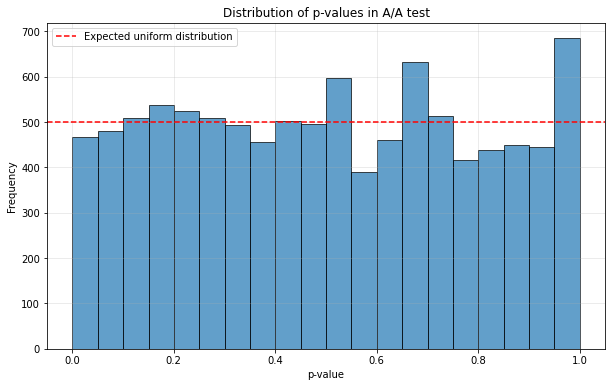

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=20, alpha=0.7, edgecolor='black')
plt.axhline(y=num_simulations/20, color='r', linestyle='--', 
            label='Expected uniform distribution')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values in A/A test')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Task 2

Estimate the minimum sample size if we want to have:
- a Type I error equal to 5%, 
- power of 90%, 
- variance of our metric equal to 10, 
- the effect we want to detect equal to 0.5.

In [6]:
alpha = 0.05       
beta = 0.10        
variance = 10      
effect_size = 0.5  

In [7]:
# initial guess for sample size (using formula)
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)
initial_n = 2 * ((z_alpha + z_beta)**2 * variance) / (effect_size**2)
n = int(initial_n)

print(f'Estimated sample size per group: {n}')

Estimated sample size per group: 840


In [8]:
def simulate_power(n, effect_size, variance, alpha=0.05, num_simulations=1000):
    count_significant = 0
    sigma = np.sqrt(variance)
    
    for _ in range(num_simulations):
        group_a = np.random.normal(0, sigma, n)
        group_b = np.random.normal(effect_size, sigma, n)
        
        _, p_val = stats.ttest_ind(group_a, group_b)
        if p_val < alpha:
            count_significant += 1
    
    return count_significant / num_simulations

In [9]:
power = simulate_power(n=n, effect_size=effect_size, variance=variance)
print(f'Power for n={n}: {power:.2f}')

Power for n=840: 0.90


Our estimated sample size is true to get the required test power!

### Task 3

Now let's try to estimate the power using simulations similar to A/A experiments.

Implement a function where you will generate two samples from a normal distribution:
- mean in the control group of 200, 
- mean in the test group of 205,
- a standard deviation of 30,
- sample size 500 users per group,
- significance level is 0.05.

In [10]:
def simulate_experiment(alpha=0.05):
    control_group = np.random.normal(loc=200, scale=30, size=500)
    test_group = np.random.normal(loc=205, scale=30, size=500)
    
    _, p_value = stats.ttest_ind(control_group, test_group, equal_var=True)
    
    return p_value < alpha

In [11]:
np.random.seed(42)
num_simulations = 10000
results = [simulate_experiment() for _ in range(num_simulations)]

power = sum(results) / num_simulations
print(f'Estimated power from simulations: {power:.4f} --> ({power*100:.2f}%)')

Estimated power from simulations: 0.7493 --> (74.93%)
